In [20]:
import math
import scipy
import warnings
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import xgboost as xgb
import matplotlib.pylab as plt

from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

matplotlib.use('nbagg');
warnings.filterwarnings("ignore");
%matplotlib inline

In [53]:
from sklearn.preprocessing import LabelEncoder

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [ ]:
"https://github.com/fiddler-labs/p2p-lending-data/raw/refs/heads/master/p2p_loans_470k/train/train_features.csv.gzLinks"

"https://github.com/fiddler-labs/p2p-lending-data/raw/refs/heads/master/p2p_loans_470k/train/train_labels.csv.gzLinks"

"https://github.com/fiddler-labs/p2p-lending-data/raw/refs/heads/master/p2p_loans_470k/test/test_features.csv.gzLinks"

"https://github.com/fiddler-labs/p2p-lending-data/raw/refs/heads/master/p2p_loans_470k/test/test_labels.csv.gzLinks"

In [44]:
import piml
#from piml import PimlClassifier

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [16]:
train_features = pd.read_csv("data3/train_features.csv.gz")
train_labels = pd.read_csv("data3/train_labels.csv.gz")
test_features = pd.read_csv("data3/test_features.csv.gz")
test_labels = pd.read_csv("data3/test_labels.csv.gz")

In [32]:
data_new = (train_features,train_labels,test_features,test_labels)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [49]:
train_features.head(20)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,id,loan_amnt,emp_title,emp_length,home_ownership,annual_inc,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_range_midpoint
0,36805548,10400.0,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,NaN,credit_card,Credit card refinancing,CA,14.92,0.0,1989-09-01,2.0,42.0,NaN,17.0,0.0,6133.0,31.6,36.0,0.0,59.0,0.0,0.0,162110.0,19400.0,7.0,9536.0,7599.0,41.5,0.0,0.0,290.0,1.0,1.0,1.0,5.0,1.0,42.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,83.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,712.0
1,37662224,7650.0,Technical Specialist,< 1 year,RENT,50000.0,NaN,debt_consolidation,Debt consolidation,AZ,34.81,0.0,2002-08-01,1.0,NaN,NaN,11.0,0.0,16822.0,91.9,20.0,0.0,NaN,0.0,0.0,64426.0,18300.0,6.0,5857.0,332.0,93.2,0.0,0.0,148.0,8.0,8.0,0.0,17.0,3.0,NaN,0.0,1.0,4.0,1.0,4.0,12.0,4.0,8.0,4.0,11.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,82331.0,64426.0,4900.0,64031.0,687.0
2,37822187,9600.0,Admin Specialist,10+ years,RENT,69000.0,NaN,debt_consolidation,Debt consolidation,NJ,25.81,0.0,1992-11-01,0.0,NaN,NaN,12.0,0.0,16388.0,59.4,44.0,0.0,NaN,0.0,0.0,38566.0,27600.0,8.0,3214.0,6494.0,69.2,0.0,0.0,265.0,23.0,3.0,0.0,24.0,17.0,NaN,0.0,4.0,7.0,5.0,16.0,17.0,8.0,26.0,7.0,12.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,52490.0,38566.0,21100.0,24890.0,682.0
3,37701596,10000.0,Investment Consultant,8 years,RENT,90000.0,NaN,debt_consolidation,Debt consolidation,MI,8.44,0.0,2003-07-01,1.0,NaN,NaN,5.0,0.0,23723.0,98.0,10.0,0.0,NaN,0.0,0.0,23723.0,24200.0,0.0,4745.0,324.0,98.5,0.0,0.0,124.0,40.0,31.0,0.0,42.0,3.0,NaN,0.0,4.0,5.0,4.0,6.0,2.0,5.0,8.0,5.0,5.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,24200.0,23723.0,21200.0,0.0,677.0
4,37800722,12975.0,Sales,10+ years,RENT,60000.0,NaN,house,Home buying,FL,22.42,0.0,1999-01-01,0.0,48.0,NaN,11.0,0.0,5200.0,33.1,19.0,0.0,NaN,0.0,900.0,17281.0,15700.0,7.0,1571.0,2604.0,52.7,0.0,0.0,122.0,2.0,2.0,0.0,6.0,1.0,NaN,0.0,3.0,8.0,3.0,6.0,6.0,9.0,13.0,8.0,11.0,0.0,0.0,0.0,4.0,89.5,0.0,0.0,42943.0,17281.0,5500.0,27243.0,682.0
5,37741884,2500.0,Manufacturing Engineer,< 1 year,MORTGAGE,89000.0,NaN,home_improvement,Home improvement,MN,13.77,0.0,2001-10-01,1.0,55.0,NaN,9.0,0.0,22908.0,94.3,32.0,0.0,NaN,0.0,0.0,397223.0,24300.0,6.0,44136.0,1333.0,86.4,0.0,0.0,148.0,24.0,6.0,5.0,24.0,2.0,NaN,0.0,3.0,4.0,3.0,6.0,17.0,4.0,10.0,4.0,9.0,0.0,0.0,0.0,1.0,96.8,0.0,0.0,415290.0,61606.0,9800.0,47946.0,687.0
6,37642222,5250.0,Store Manager,2 years,RENT,26000.0,NaN,debt_consolidation,Debt consolidation,MD,14.36,0.0,2009-05-01,0.0,NaN,NaN,8.0,0.0,4448.0,20.2,13.0,0.0,NaN,0.0,0.0,10133.0,22000.0,4.0,1267.0,12152.0,26.8,0.0,0.0,67.0,12.0,6.0,0.0,16.0,NaN,NaN,0.0,2.0,2.0,3.0,4.0,3.0,6.0,9.0,2.0,8.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,29971.0,10133.0,16600.0,6000.0,747.0
7,37682226,17000.0,Deputy sheriff,10+ years,MORTGAGE,75000.0,NaN,debt_consolidation,Debt consolidation,NY,23.63,0.0,2001-01-01,0.0,46.0,NaN,7.0,0.0,5063.0,46.4,31.0,0.0,51.0,0.0,0.0,122193.0,10900.0,2.0,17456.0,71.0,98.2,0.0,0.0,167.0,21.0,10.0,2.0,27.0,NaN,46.0,2.0,1.0,3.0,1.0,7.0,4.0,4.0,25.0,3.0,7.0,0.0,0.0,0.0,1.0,87.1,0.0,0.0,147270.0,36205.0,4000.0,41370.0,677.0
8,36804663,23325.0,Teacher,10+ years,RENT,72000.0,NaN,credit_card,Credit card refinancing,WA,27.03,1.0,1998-10-01,0.0,1.0,NaN,14.0,0.0,32372.

In [48]:
train_labels.head(10)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,id,loan_status,issue_d,zip_code_prefix,grade,sub_grade,installment,int_rate,collection_recovery_fee,recoveries,debt_settlement_flag,settlement_amount,settlement_date,settlement_percentage,settlement_status,settlement_term,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
0,36805548,Charged Off,2014-12-01,937,A,A3,321.08,6.99,93.8286,521.27,N,NaN,NaN,NaN,NaN,NaN,6611.690000,6611.69,872.67,0.0,5217.75
1,37662224,Charged Off,2014-12-01,850,C,C3,260.20,13.66,222.8382,1237.99,N,NaN,NaN,NaN,NaN,NaN,2281.980000,2281.98,339.61,0.0,704.38
2,37822187,Fully Paid,2014-12-01,77,C,C3,326.53,13.66,0.0000,0.00,N,NaN,NaN,NaN,NaN,NaN,9973.430000,9973.43,373.43,0.0,9600.00
3,37701596,Charged Off,2014-12-01,483,B,B5,332.10,11.99,0.0000,0.00,N,NaN,NaN,NaN,NaN,NaN,6957.450000,6957.45,1562.16,0.0,5395.29
4,37800722,Charged Off,2014-12-01,331,D,D5,468.17,17.86,272.7990,1515.55,N,NaN,NaN,NaN,NaN,NaN,5746.890000,5746.89,1603.20,0.0,2628.14
5,37741884,Fully Paid,2014-12-01,554,B,B5,83.03,11.99,0.0000,0.00,N,NaN,NaN,NaN,NaN,NaN,2622.220000,2622.22,122.22,0.0,2500.00
6,37642222,Fully Paid,2014-12-01,208,B,B4,172.98,11.44,0.0000,0.00,N,NaN,NaN,NaN,NaN,NaN,5431.680000,5431.68,181.68,0.0,5250.00
7,37682226,Fully Paid,2014-12-01,144,C,C3,578.22,13.66,0.0000,0.00,N,NaN,NaN,NaN,NaN,NaN,19562.310001,19562.31,2562.31,0.0,17000.00
8,36804663,Charged Off,2014-12-01,982,C,C4,800.71,14.31,638.0856,3544.92,N,NaN,NaN,NaN,NaN,NaN,13907.790000,13907.79,3061.64,0.0,7301.23
9,37742142,Fully Paid,2014-12-01,112,C,C5,69.33,14.99,0.0000,0.00,N,NaN,NaN,NaN,NaN,NaN,2101.520000,2101.52,101.52,0.0,2000.00


In [17]:
test_features.head(5)

,id,loan_amnt,emp_title,emp_length,home_ownership,annual_inc,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_range_midpoint
0,59481599,4800.0,driver,10+ years,MORTGAGE,92000.0,NaN,debt_consolidation,Debt consolidation,CA,11.86,0.0,2003-05-01,0.0,31.0,NaN,9.0,0.0,6266.0,66.0,13.0,0.0,NaN,0.0,0.0,35037.0,9500.0,5.0,4380.0,3234.0,66.0,0.0,0.0,147.0,1.0,1.0,0.0,1.0,22.0,31.0,0.0,5.0,5.0,6.0,9.0,3.0,6.0,10.0,5.0,9.0,0.0,0.0,0.0,3.0,84.6,0.0,0.0,46495.0,35037.0,9500.0,36995.0,667.0
1,58240450,22000.0,Teaacher/Coach,10+ years,OWN,65500.0,NaN,debt_consolidation,Debt consolidation,GA,15.02,0.0,1991-11-01,0.0,72.0,NaN,11.0,0.0,11489.0,38.2,24.0,0.0,NaN,0.0,0.0,205204.0,30100.0,4.0,18655.0,3168.0,51.3,0.0,0.0,120.0,11.0,11.0,5.0,13.0,13.0,NaN,0.0,2.0,7.0,2.0,2.0,8.0,8.0,11.0,7.0,11.0,0.0,0.0,0.0,2.0,95.8,0.0,0.0,241261.0,29400.0,6500.0,27736.0,727.0
2,59243150,28000.0,Senior Business Manager,4 years,MORTGAGE,150000.0,NaN,credit_card,Credit card refinancing,TX,8.14,0.0,2011-11-01,0.0,NaN,NaN,18.0,0.0,47038.0,38.1,23.0,0.0,NaN,0.0,0.0,251385.0,123400.0,7.0,13966.0,73278.0,39.1,0.0,0.0,45.0,9.0,9.0,1.0,9.0,7.0,NaN,0.0,13.0,14.0,14.0,17.0,2.0,16.0,20.0,14.0,18.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,340895.0,56779.0,120300.0,19495.0,682.0
3,59230103,16000.0,FLIGHT ATTENDANT,10+ years,RENT,80000.0,NaN,credit_card,Credit card refinancing,GA,31.74,0.0,1999-06-01,1.0,35.0,NaN,11.0,0.0,15768.0,55.5,25.0,0.0,35.0,0.0,0.0,107369.0,28400.0,6.0,9761.0,1171.0,90.3,0.0,0.0,192.0,1.0,1.0,4.0,59.0,1.0,NaN,0.0,4.0,8.0,4.0,5.0,6.0,10.0,15.0,8.0,11.0,0.0,0.0,0.0,1.0,91.7,0.0,0.0,146827.0,107369.0,12100.0,118427.0,677.0
4,59471821,27200.0,Senior Manager,4 years,MORTGAGE,143000.0,NaN,credit_card,Credit card refinancing,GA,18.46,0.0,2003-07-01,1.0,NaN,NaN,15.0,0.0,64141.0,68.5,24.0,0.0,NaN,0.0,0.0,514073.0,93700.0,4.0,34272.0,13159.0,82.9,0.0,0.0,145.0,7.0,7.0,1.0,7.0,3.0,NaN,0.0,8.0,9.0,8.0,11.0,9.0,11.0,14.0,9.0,15.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,564598.0,119889.0,76900.0,69998.0,697.0


In [18]:
test_labels.head(5)

,id,loan_status,issue_d,zip_code_prefix,grade,sub_grade,installment,int_rate,collection_recovery_fee,recoveries,debt_settlement_flag,settlement_amount,settlement_date,settlement_percentage,settlement_status,settlement_term,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
0,59481599,Fully Paid,2015-08-01,922,C,C4,164.03,13.99,0.0000,0.00,N,NaN,NaN,NaN,NaN,NaN,5864.950512,5864.95,1064.95,0.0,4800.00
1,58240450,Fully Paid,2015-08-01,305,B,B3,709.78,9.99,0.0000,0.00,N,NaN,NaN,NaN,NaN,NaN,23373.490000,23373.49,1373.49,0.0,22000.00
2,59243150,Fully Paid,2015-08-01,750,A,A1,843.22,5.32,0.0000,0.00,N,NaN,NaN,NaN,NaN,NaN,30347.401542,30347.40,2347.40,0.0,28000.00
3,59230103,Charged Off,2015-08-01,300,B,B3,516.20,9.99,174.5352,969.64,N,NaN,NaN,NaN,NaN,NaN,9168.690000,9168.69,1673.17,0.0,6525.88
4,59471821,Fully Paid,2015-08-01,303,A,A5,850.97,7.89,0.0000,0.00,N,NaN,NaN,NaN,NaN,NaN,30622.981647,30622.98,3422.98,0.0,27200.00


In [50]:
# Run once in one session
drop_features = train_features.select_dtypes(['datetime', 'O']).columns.tolist()
print('Dropping: ', drop_features)
train_features.drop(columns=drop_features, inplace=True)
test_features.drop(columns=drop_features, inplace=True)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Dropping:  ['emp_title', 'emp_length', 'home_ownership', 'desc', 'purpose', 'title', 'addr_state', 'earliest_cr_line']


In [51]:
#Run once in one session
most_missing_cols = train_features.isna().mean().sort_values(ascending=False)
drop_features = most_missing_cols.index.tolist()[:4]
print('Dropping: ', drop_features)
train_features.drop(columns=drop_features, inplace=True)
test_features.drop(columns=drop_features, inplace=True)
train_target = train_labels['loan_status']
test_target = test_labels['loan_status']

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Dropping:  ['mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_recent_revol_delinq', 'mths_since_last_delinq']


In [52]:
X_train = train_features
y_train = train_target
X_test = test_features
y_test = test_target

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [54]:
label_encoder = LabelEncoder()

y_train_labeled = label_encoder.fit_transform(y_train.values.ravel())
y_test_labeled = label_encoder.transform(y_test.values.ravel())

y_train_labeled_df = pd.DataFrame(y_train_labeled, columns=['Label'])
y_test_labeled_df = pd.DataFrame(y_test_labeled, columns=['Label'])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [55]:
# We are only using 10,000 rows becuase it is a very big dataset
def limit_rows(x_data, y_data, max_rows=10000):

    if len(x_data) > max_rows:
        x_data = x_data.iloc[:max_rows, :]
        y_data = y_data.iloc[:max_rows, :]
    return x_data, y_data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [57]:
y_test = y_test_labeled_df
y_train = y_train_labeled_df
X_test = X_test.fillna(0)
X_train = X_train.fillna(0)
x_train_limited, y_train_limited = limit_rows(X_train, y_train, max_rows=10000)
x_test_limited, y_test_limited = limit_rows(X_test, y_test, max_rows=10000)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [61]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train_limited, y_train_limited)
pred = model.predict(x_test_limited)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_limited, pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Accuracy: 72.67%


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

[Text(0.6497030800269489, 0.9838709677419355, 'fico_range_midpoint <= 709.5\ngini = 0.231\nsamples = 10000\nvalue = [1330, 8670]\nclass = y[1]'),
 Text(0.37262129984874515, 0.9516129032258065, 'num_tl_op_past_12m <= 1.5\ngini = 0.262\nsamples = 7193\nvalue = [1116, 6077]\nclass = y[1]'),
 Text(0.1463224216362353, 0.9193548387096774, 'annual_inc <= 24980.0\ngini = 0.212\nsamples = 3058\nvalue = [369, 2689]\nclass = y[1]'),
 Text(0.044816801435279975, 0.8870967741935484, 'tot_hi_cred_lim <= 174177.0\ngini = 0.343\nsamples = 182\nvalue = [40, 142]\nclass = y[1]'),
 Text(0.04363762404969127, 0.8548387096774194, 'mo_sin_old_rev_tl_op <= 367.0\ngini = 0.328\nsamples = 179\nvalue = [37, 142]\nclass = y[1]'),
 Text(0.038331325814542114, 0.8225806451612904, 'bc_open_to_buy <= 10810.0\ngini = 0.301\nsamples = 168\nvalue = [31, 137]\nclass = y[1]'),
 Text(0.03361461627218731, 0.7903225806451613, 'annual_inc <= 23204.0\ngini = 0.265\nsamples = 153\nvalue = [24, 129]\nclass = y[1]'),
 Text(0.028897

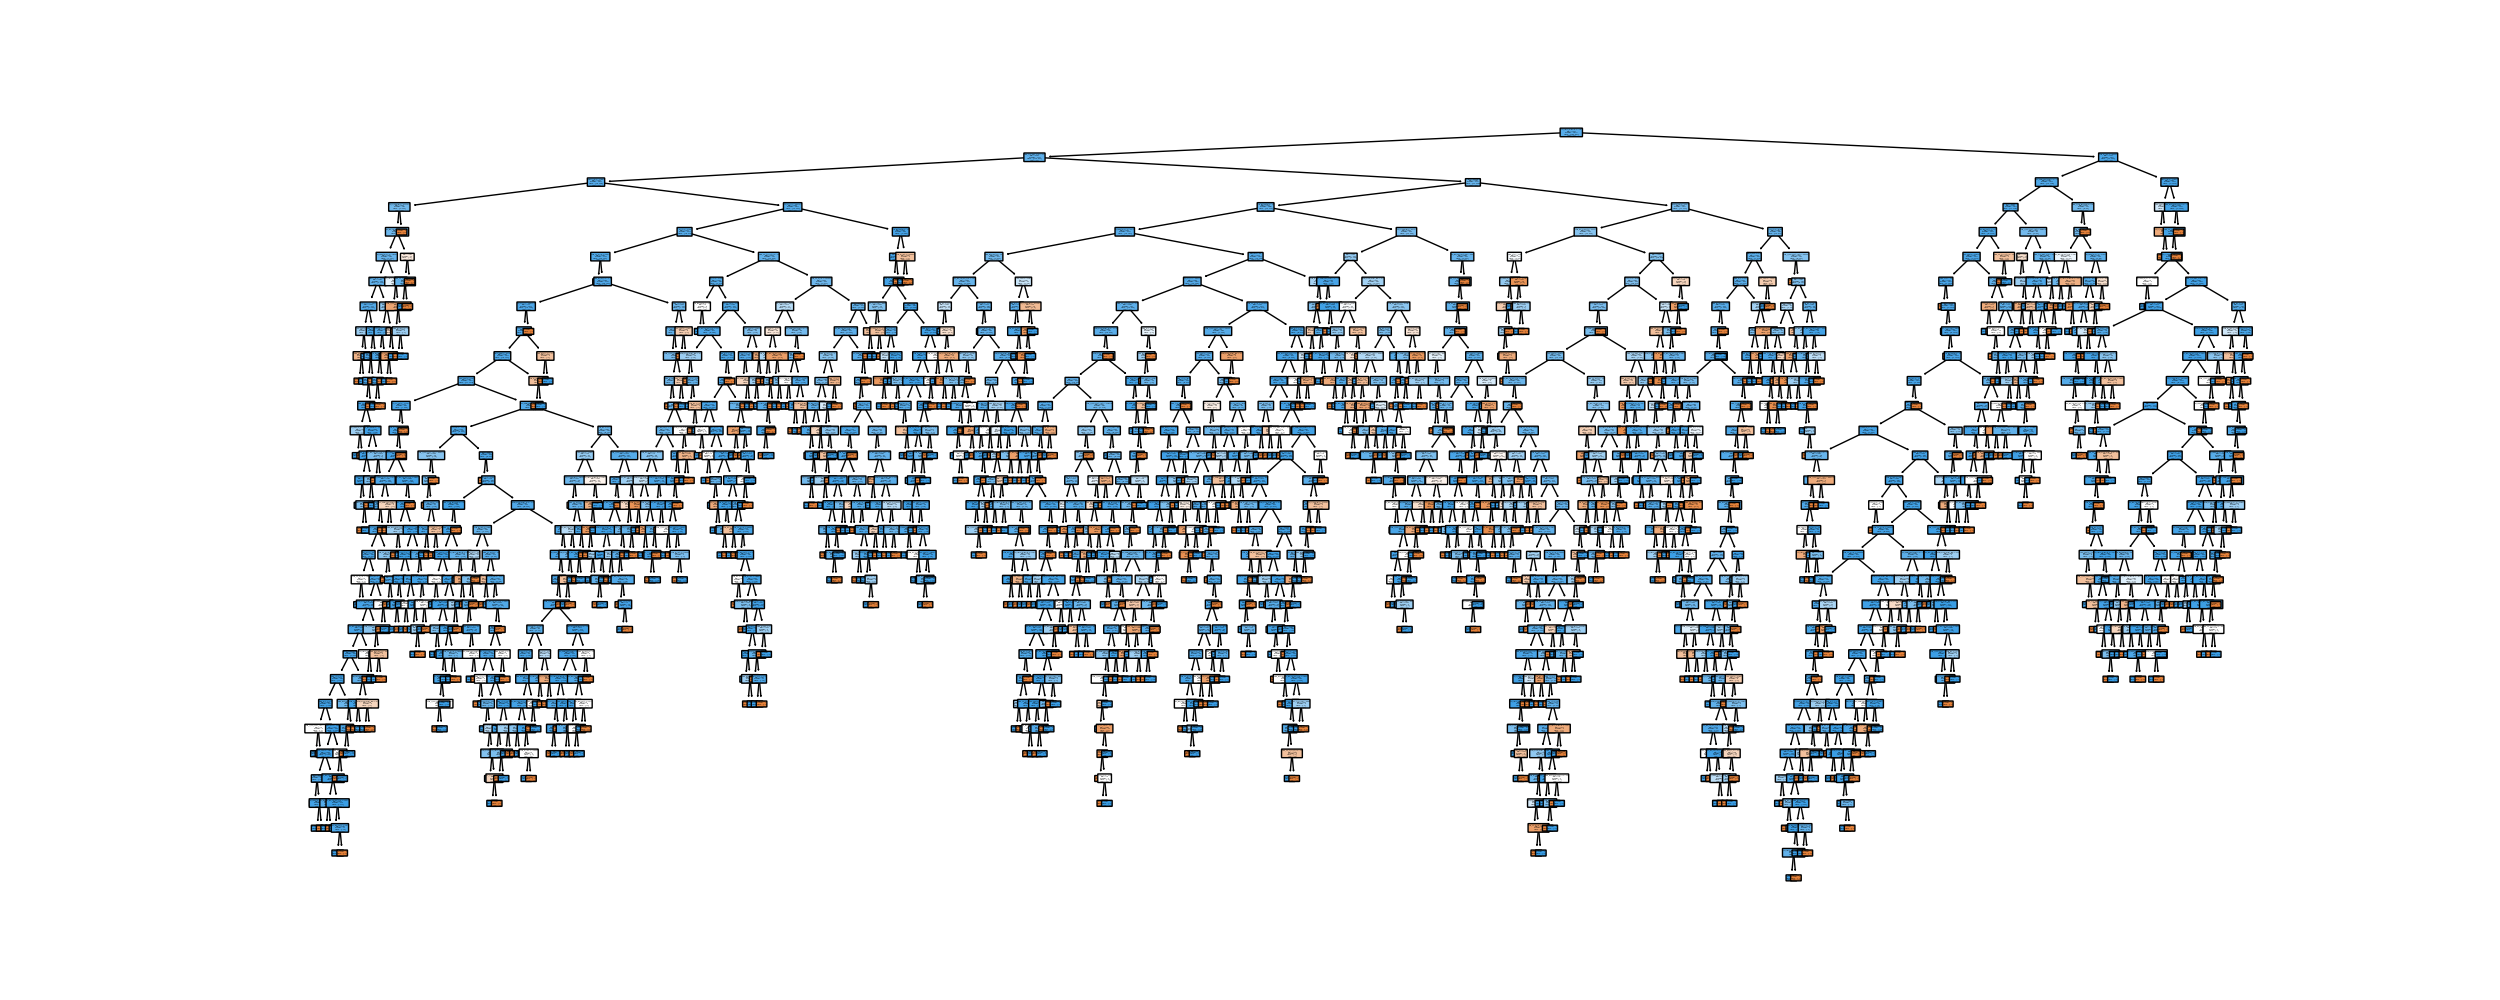

In [64]:
plt.figure(figsize=(25,10)) 
plot_tree(model, filled=True, feature_names=x_train_limited.columns, class_names=True, rounded=True)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Decision Tree Classifier Accuracy (Pruned): 86.03%


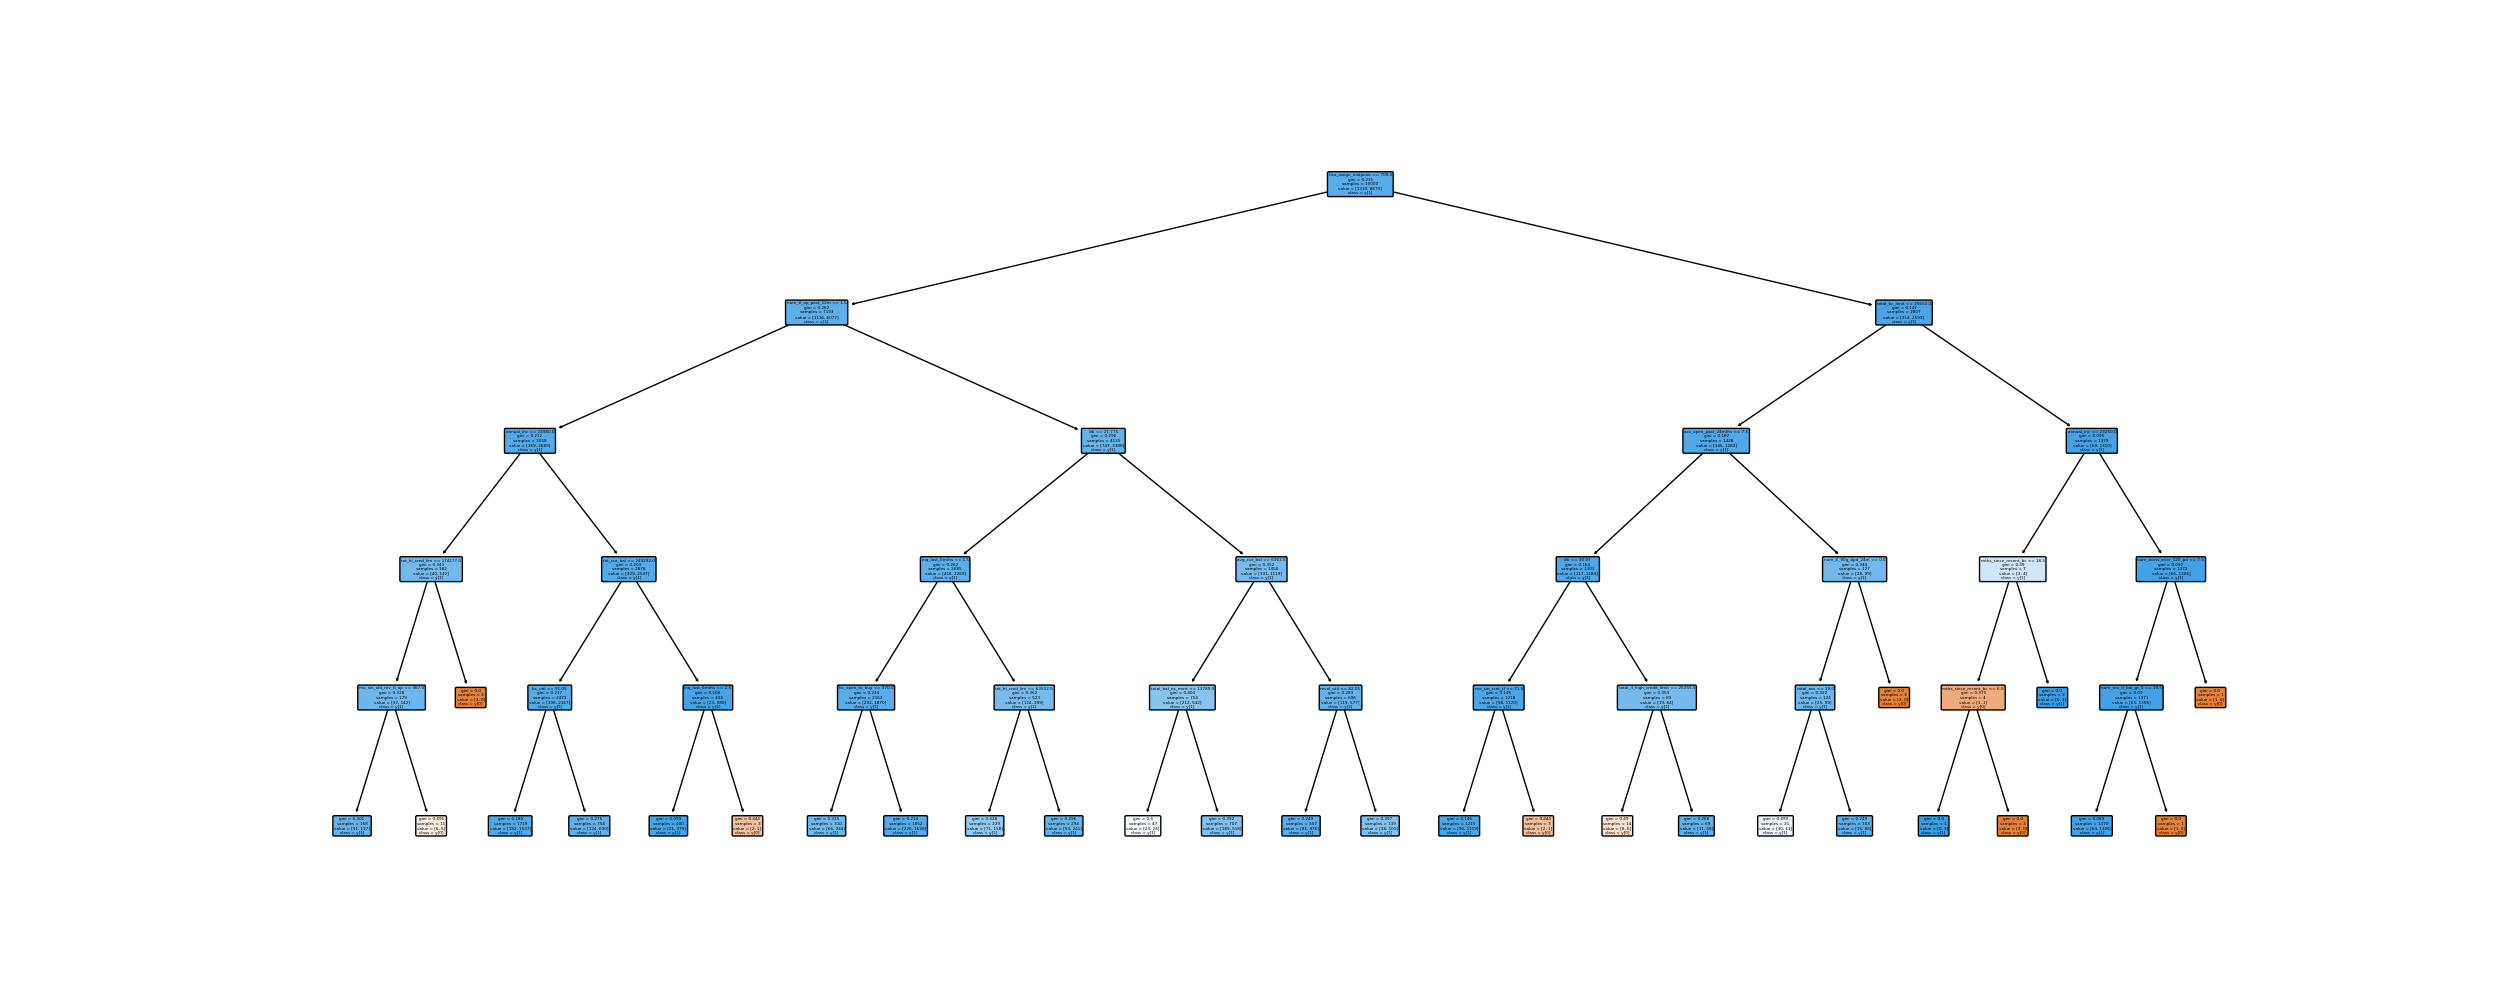

In [65]:

pruned = DecisionTreeClassifier(max_depth=5, random_state=42)
pruned.fit(x_train_limited, y_train_limited)

y_pred_pruned = pruned.predict(x_test_limited)

accuracy_pruned = accuracy_score(y_test_limited, y_pred_pruned)
print(f'Decision Tree Classifier Accuracy (Pruned): {accuracy_pruned * 100:.2f}%')

plt.figure(figsize=(25, 10))
plot_tree(pruned, filled=True, feature_names=x_train_limited.columns, class_names=True, rounded=True)
plt.show()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

AUC: 0.52


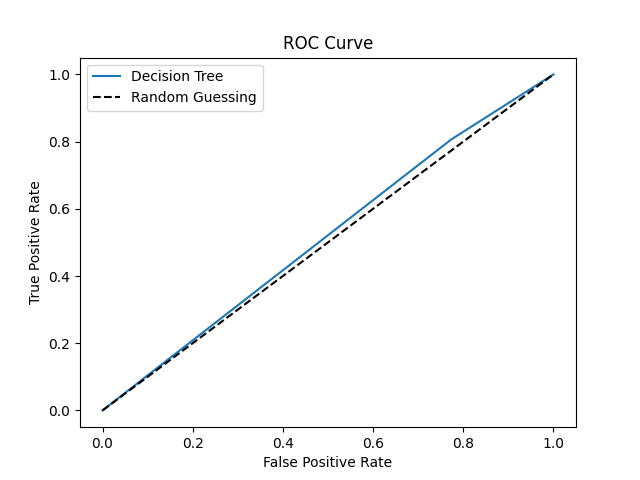

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ... (your existing code for loading data, splitting, and fitting the model)

# Predict probabilities for the positive class
y_pred_proba = model.predict_proba(x_test_limited)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test_limited, y_pred_proba)
print(f'AUC: {auc:.2f}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_limited, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='Decision Tree')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()